In [1]:
library(rethinking)

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Lade nötiges Paket: parallel

rethinking (Version 2.31)

In [37]:
d <- read.csv(file = "data\\plot_data\\correlation_0.csv", sep = ",", header = FALSE)
colnames(d) <- c("original_data")
d$corr <- d$original_data[11] - d$original_data
d$index <- 1:nrow(d) - 1
d$corr_fn <- d$corr / max(d$corr)
d

original_data,corr,index,corr_fn
<dbl>,<dbl>,<dbl>,<dbl>
946.5809,24.597182,0,1.000000000
951.3667,19.811288,1,0.805429175
955.8138,15.364247,2,0.624634440
959.8922,11.285868,3,0.458827682
963.3189,7.859162,4,0.319514731
966.2169,4.961129,5,0.201695015
968.2831,2.894886,6,0.117691775
969.6660,1.512075,7,0.061473505
970.5903,0.587699,8,0.023892940


In [41]:
model <- ulam(
	alist(
		corr ~ dnorm(mu, sigma),
		mu <- A * (cosh(m * (index - 10)) - 1),
		A ~ dnorm(50, 100),
		m ~ dexp(10),
		# beta_half ~ dnorm(5, 2),
		sigma ~ dunif(0, 1000)
	),
	constraints = list(A="lower=0", m="lower=0"),
	data = d, chains = 8, cores = 8, log_lik = TRUE
)

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpYBunrv/model-28d42d427ec6.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 1

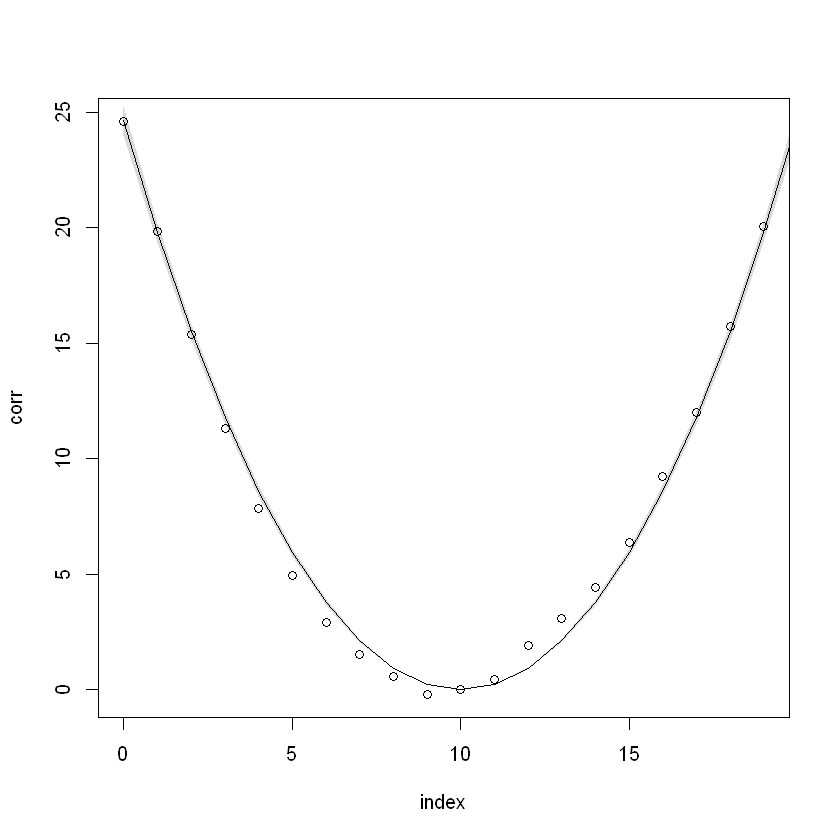

In [42]:
post <- extract.samples(model)
mu_link <- function(index) post$A * (cosh(post$m * (index - 10)) - 1)

plot(corr ~ index, data = d)

index_seq <- 0:nrow(d)

mu <- sapply(index_seq, mu_link)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = 0.91)

lines(index_seq, mu_mean)
shade(mu_HPDI, index_seq)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,102.18109935,56.8739215,34.54059700,209.9189850,750.6133,1.013559
m,0.07599088,0.0214492,0.04784319,0.1141988,683.9633,1.010638
sigma,0.61468552,0.1041647,0.47377574,0.8028654,1436.4093,1.004722


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


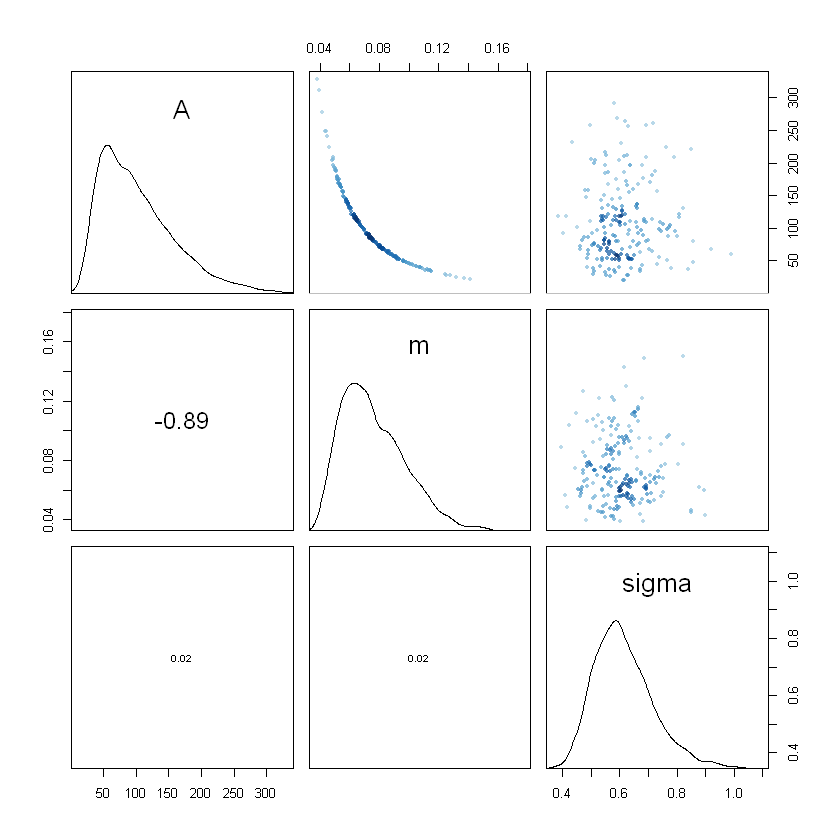

In [43]:
precis(model)
pairs(model)